In [1]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
from scipy.stats import ttest_ind, ttest_ind_from_stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dir_path = os.path.join(os.path.sep,'Users', 'qianwu', 'Documents', 'GitHub', 'gender_paper')
milk_brain_data_path = os.path.join(dir_path, 'milk_data', 'milk_brain.xlsx')
egg_brain_data_path = os.path.join(dir_path, 'egg_data', 'egg_brain_data.xlsx')

milk_brain = pd.read_excel(milk_brain_data_path)
egg_brain = pd.read_excel(egg_brain_data_path)

In [3]:
female_filter = milk_brain['sex']=='Female'
male_filter = milk_brain['sex']=='Male'

In [4]:
pricef_filter_col = [col for col in milk_brain if col.endswith('pf')]
techf_filter_col = [col for col in milk_brain if col.endswith('tf')]
combof_filter_col = [col for col in milk_brain if col.endswith('cf')]

price_filter_col = [col for col in milk_brain if col.endswith('p')]
tech_filter_col = [col for col in milk_brain if col.endswith('t')]
combo_filter_col = [col for col in milk_brain if col.endswith('c')]

In [5]:
pricef_filter_col = pricef_filter_col[1:]
techf_filter_col = techf_filter_col[1:]
combof_filter_col = combof_filter_col[4:]

price_filter_col = price_filter_col[1:12]
tech_filter_col = tech_filter_col[2:13]
combo_filter_col = combo_filter_col[2:13]

In [6]:
female_price = milk_brain[pricef_filter_col][female_filter]
female_tech = milk_brain[techf_filter_col][female_filter]
female_combo = milk_brain[combof_filter_col][female_filter]

male_price = milk_brain[pricef_filter_col][male_filter]
male_tech = milk_brain[techf_filter_col][male_filter]
male_combo = milk_brain[combof_filter_col][male_filter]

### Milk experiment brain behavioral analysis
Please check Table 2 in the paper for the names: 
<br>
__rstgpp	rstgpt	rstgpc	rstgpf__: (R)Superior temporal gyrus, BA 38 26 13	-15	-4.32 17 in price, tech, comb, base exp
<br>
__rstgtp	rstgtt	rstgtc	rstgtf__: (R)Superior temporal gyrus, BA 38 38 22	-27	-3.79 14
<br>
__lmfgp	lmfgt	lmfgc	lmfgf__: (L) Middle frontal gyrus, BA 46	-43	22	27	4.53 19

#### construct variables against baseline conditions. 

In [7]:
milk_brain['rstgppf']  = milk_brain['rstgpp'] - milk_brain['rstgpf']
milk_brain['rstgptf']  = milk_brain['rstgpt'] - milk_brain['rstgpf']
milk_brain['rstgpcf']  = milk_brain['rstgpc'] - milk_brain['rstgpf']

milk_brain['rstgtpf']  = milk_brain['rstgtp'] - milk_brain['rstgtf']
milk_brain['rstgttf']  = milk_brain['rstgtt'] - milk_brain['rstgtf']
milk_brain['rstgtcf']  = milk_brain['rstgtc'] - milk_brain['rstgtf']

milk_brain['lmfgpf']  = milk_brain['lmfgp'] - milk_brain['lmfgf']
milk_brain['lmfgtf']  = milk_brain['lmfgt'] - milk_brain['lmfgf']
milk_brain['lmfgcf']  = milk_brain['lmfgc'] - milk_brain['lmfgf']

In [8]:
milk_data = milk_brain[['rstgppf', 'rstgptf','rstgpcf', 'rstgtpf', 'rstgttf', 'rstgtcf', 'lmfgpf', 'lmfgtf',\
                   'lmfgcf', 'gender','altruism', 'clone', 'clone2', 'gh2']]
milk_data.rename(columns={'clone': 'clone_acceptable','clone2': 'clone_choice_number', 'gh2':'gh_choice_number'}, inplace=True)

/Users/qianwu/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [9]:
milk_data.corr()

,rstgppf,rstgptf,rstgpcf,rstgtpf,rstgttf,rstgtcf,lmfgpf,lmfgtf,lmfgcf,gender,altruism,clone_acceptable,clone_choice_number,gh_choice_number
rstgppf,1.000000,0.890107,0.772857,0.791786,0.776801,0.691522,-0.012774,0.027616,-0.067563,0.289558,0.044157,0.005855,0.064876,0.028771
rstgptf,0.890107,1.000000,0.888137,0.693689,0.769141,0.705536,0.007248,0.130587,0.095598,0.124045,0.121336,0.056596,0.115985,-0.029015
rstgpcf,0.772857,0.888137,1.000000,0.691404,0.726559,0.804827,-0.051675,0.059665,0.039488,0.072824,0.123228,0.046115,0.077477,-0.046195
rstgtpf,0.791786,0.693689,0.691404,1.000000,0.954773,0.928249,-0.247467,-0.191928,-0.254819,0.245609,0.103974,-0.097311,-0.069771,-0.088098
rstgttf,0.776801,0.769141,0.726559,0.954773,1.000000,0.934768,-0.195819,-0.105693,-0.159759,0.217818,0.100571,-0.071067,-0.039068,-0.133298
rstgtcf,0.691522,0.705536,0.804827,0.928249,0.934768,1.000000,-0.208063,-0.112902,-0.144697,0.175645,0.141634,-0.079755,-0.073035,-0.149936
lmfgpf,-0.012774,0.007248,-0.051675,-0.247467,-0.195819,-0.208063,1.000000,0.886392,0.774150,-0.236956,-0.075157,0.154046,0.205269,0.257360
lmfgtf,0.027616,0.130587,0.059665,-0.191928,-0.105693,-0.112902,0.886392,1.000000,0.918491,-0.272144,0.040598,0.096269,0.163450,0.158760
lmfgcf,-0.067563,0.095598,0.039488,-0.254819,-0.159759,-0.144697,0.774150,0.918491,1.000000,-0.366881,0.051046,0.147203,0.177156,0.159979
gender,0.289558,0.124045,0.072824,0.245609,0.217818,0.175645,-0.236956,-0.272144,-0.366881,1.000000,-0.199296,-0.318841,-0.371516,-0.429559


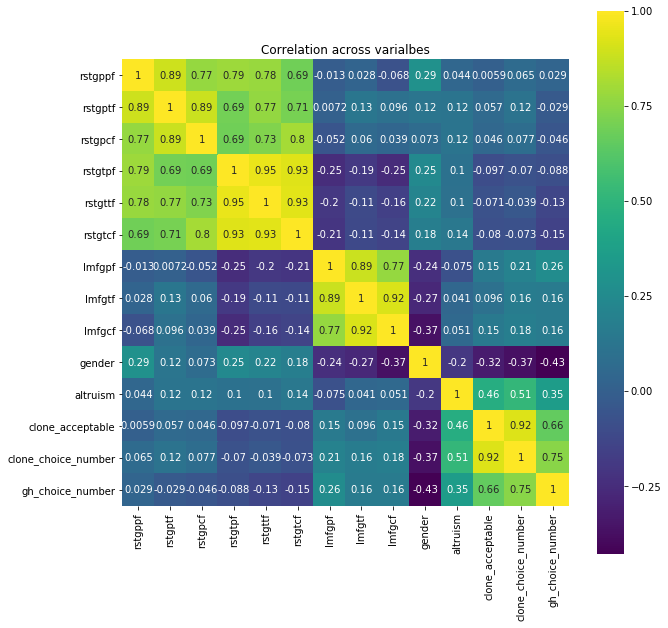

In [10]:
correlation = milk_data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation across varialbes')

### Egg experiment brain behavioral analysis
Please check Table 2 in the paper for the names
<br>
Note: 
1. Amanda already did the substraction against baseline condition for egg experiment.
2. Column meaning
<br>
__CG__: number of caged egg choices
<br>
__CGF__: number of cage-free egg choices
<br>
__CFG__: number of confined egg choices
<br>
__FR__: number of free range egg choices

In [11]:
base_filter_col = [col for col in egg_brain if col.endswith('_F')]

In [12]:
egg_brain['gender'] = np.where(egg_brain['Sex']=='Female', 1, 0)
egg_data = egg_brain.drop(base_filter_col, axis=1)
egg_data = egg_data.drop('Subjects', axis=1)

In [13]:
from IPython.display import display, HTML
display(HTML(egg_data.corr().to_html()))

,primary,CG,CGF,CNF,FR,ACC_P,ACC_M,ACC_C,Linsula_P,Linsula_M,Linsula_C,Lthalamus_P,Lthalamus_M,Lthalamus_C,Lvs_P,Lvs_M,Lvs_C,Ramygdala_P,Ramygdala_M,Ramygdala_C,SupTempGyrus_P,SupTempGyrus_M,SupTempGyrus_C,Supfrontal_P,Supfrontal_M,Supfrontal_C,RdlPFC_P,RdlPFC_M,RdlPFC_C,Rinsula_P,Rinsula_M,Rinsula_C,RVS_P,RVS_M,RVS_C,VMPFC_P,VMPFC_M,VMPFC_C,Rthala_P,Rthala_M,Rthala_C,PCC_P,PCC_M,PCC_C,gender
primary,1.000000,0.012189,-0.012189,-0.005888,0.005888,-0.115698,-0.069805,0.098395,-0.367753,-0.326295,-0.140495,-0.270570,-0.196153,-0.061290,-0.210115,0.098128,0.050277,-0.040524,0.060334,0.085531,0.051615,-0.005402,0.234359,0.016623,-0.047657,0.047316,-0.241753,-0.216636,-0.189447,-0.198468,-0.212664,-0.083541,-0.216472,-0.130273,-0.220670,-0.102092,0.044759,0.103696,-0.074805,-0.074166,0.108164,-0.240085,-0.122279,-0.108298,-0.076741
CG,0.012189,1.000000,-1.000000,0.986399,-0.986399,0.118170,0.157770,0.022288,0.083818,0.074151,-0.013527,-0.020855,0.046066,-0.093196,-0.052907,-0.054783,-0.199394,0.162392,0.130150,-0.085484,0.199532,0.084965,-0.076167,0.106653,0.122389,0.053502,0.251581,0.110410,-0.001441,0.279412,0.146129,0.099780,0.252371,0.203376,0.131964,0.197614,-0.003899,-0.250242,-0.108107,0.027725,-0.176792,-0.006489,0.012333,-0.071512,-0.281090
CGF,-0.012189,-1.000000,1.000000,-0.986399,0.986399,-0.118170,-0.157770,-0.022288,-0.083818,-0.074151,0.013527,0.020855,-0.046066,0.093196,0.052907,0.054783,0.199394,-0.162392,-0.130150,0.085484,-0.199532,-0.084965,0.076167,-0.106653,-0.122389,-0.053502,-0.251581,-0.110410,0.001441,-0.279412,-0.146129,-0.099780,-0.252371,-0.203376,-0.131964,-0.197614,0.003899,0.250242,0.108107,-0.027725,0.176792,0.006489,-0.012333,0.071512,0.281090
CNF,-0.005888,0.986399,-0.986399,1.000000,-1.000000,0.125514,0.161659,0.024424,0.071828,0.081469,0.001565,0.001601,0.066385,-0.042030,-0.030827,-0.062524,-0.203801,0.150096,0.103545,-0.107469,0.229274,0.099605,-0.054878,0.122767,0.125577,0.069296,0.263399,0.110559,0.006795,0.318673,0.189023,0.135509,0.264786,0.214440,0.133824,0.193694,-0.015822,-0.274795,-0.059584,0.053979,-0.125000,0.023857,0.025290,-0.039055,-0.285838
FR,0.005888,-0.986399,0.986399,-1.000000,1.000000,-0.125514,-0.161659,-0.024424,-0.071828,-0.081469,-0.001565,-0.001601,-0.066385,0.042030,0.030827,0.062524,0.203801,-0.150096,-0.103545,0.107469,-0.229274,-0.099605,0.054878,-0.122767,-0.125577,-0.069296,-0.263399,-0.110559,-0.006795,-0.318673,-0.189023,-0.135509,-0.264786,-0.214440,-0.133824,-0.193694,0.015822,0.274795,0.059584,-0.053979,0.125000,-0.023857,-0.025290,0.039055,0.285838
ACC_P,-0.115698,0.118170,-0.118170,0.125514,-0.125514,1.000000,0.784209,0.639292,0.523605,0.402499,0.394111,0.459794,0.301895,0.298604,0.578353,0.539036,0.190934,0.416741,0.399796,0.084936,0.219139,0.038938,0.080066,0.328578,0.239147,0.270533,0.686800,0.477225,0.351073,0.593315,0.513938,0.376294,0.290434,0.272998,0.080978,0.351490,0.260577,0.063719,0.363563,0.319610,0.178164,0.694622,0.394832,0.476439,-0.119544
ACC_M,-0.069805,0.157770,-0.157770,0.161659,-0.161659,0.784209,1.000000,0.488125,0.449449,0.602502,0.179463,0.356399,0.549947,0.174121,0.432169,0.677729,0.099883,0.380438,0.626806,0.102009,0.027693,0.125128,-0.131023,0.182306,0.275555,0.100277,0.512655,0.592482,0.221119,0.504824,0.607407,0.205989,0.257588,0.369139,-0.022666,0.167930,0.214741,-0.087813,0.316381,0.506853,0.176528,0.461240,0.558846,0.342203,-0.084417
ACC_C,0.098395,0.022288,-0.022288,0.024424,-0.024424,0.639292,0.488125,1.000000,0.081114,-0.009751,0.228060,0.066069,-0.128181,0.325223,0.292577,0.296404,0.226050,0.099079,0.072400,0.011271,0.171715,-0.042813,0.338975,0.196447,0.104773,0.214673,0.333808,0.124043,0.510948,0.255551,0.158469,0.363320,-0.049161,-0.197966,0.017313,0.125913,0.083062,0.194579,0.046865,-0.153452,0.435766,0.386822,0.261414,0.564834,-0.101422
Linsula_P,-0.367753,0.083818,-0.083818,0.071828,-0.071828,0.523605,0.449449,0.081114,1.000000,0.700885,0.580636,0.814461,0.610638,0.423300,0.586355,0.303957,0.239666,0.575521,0.378158,

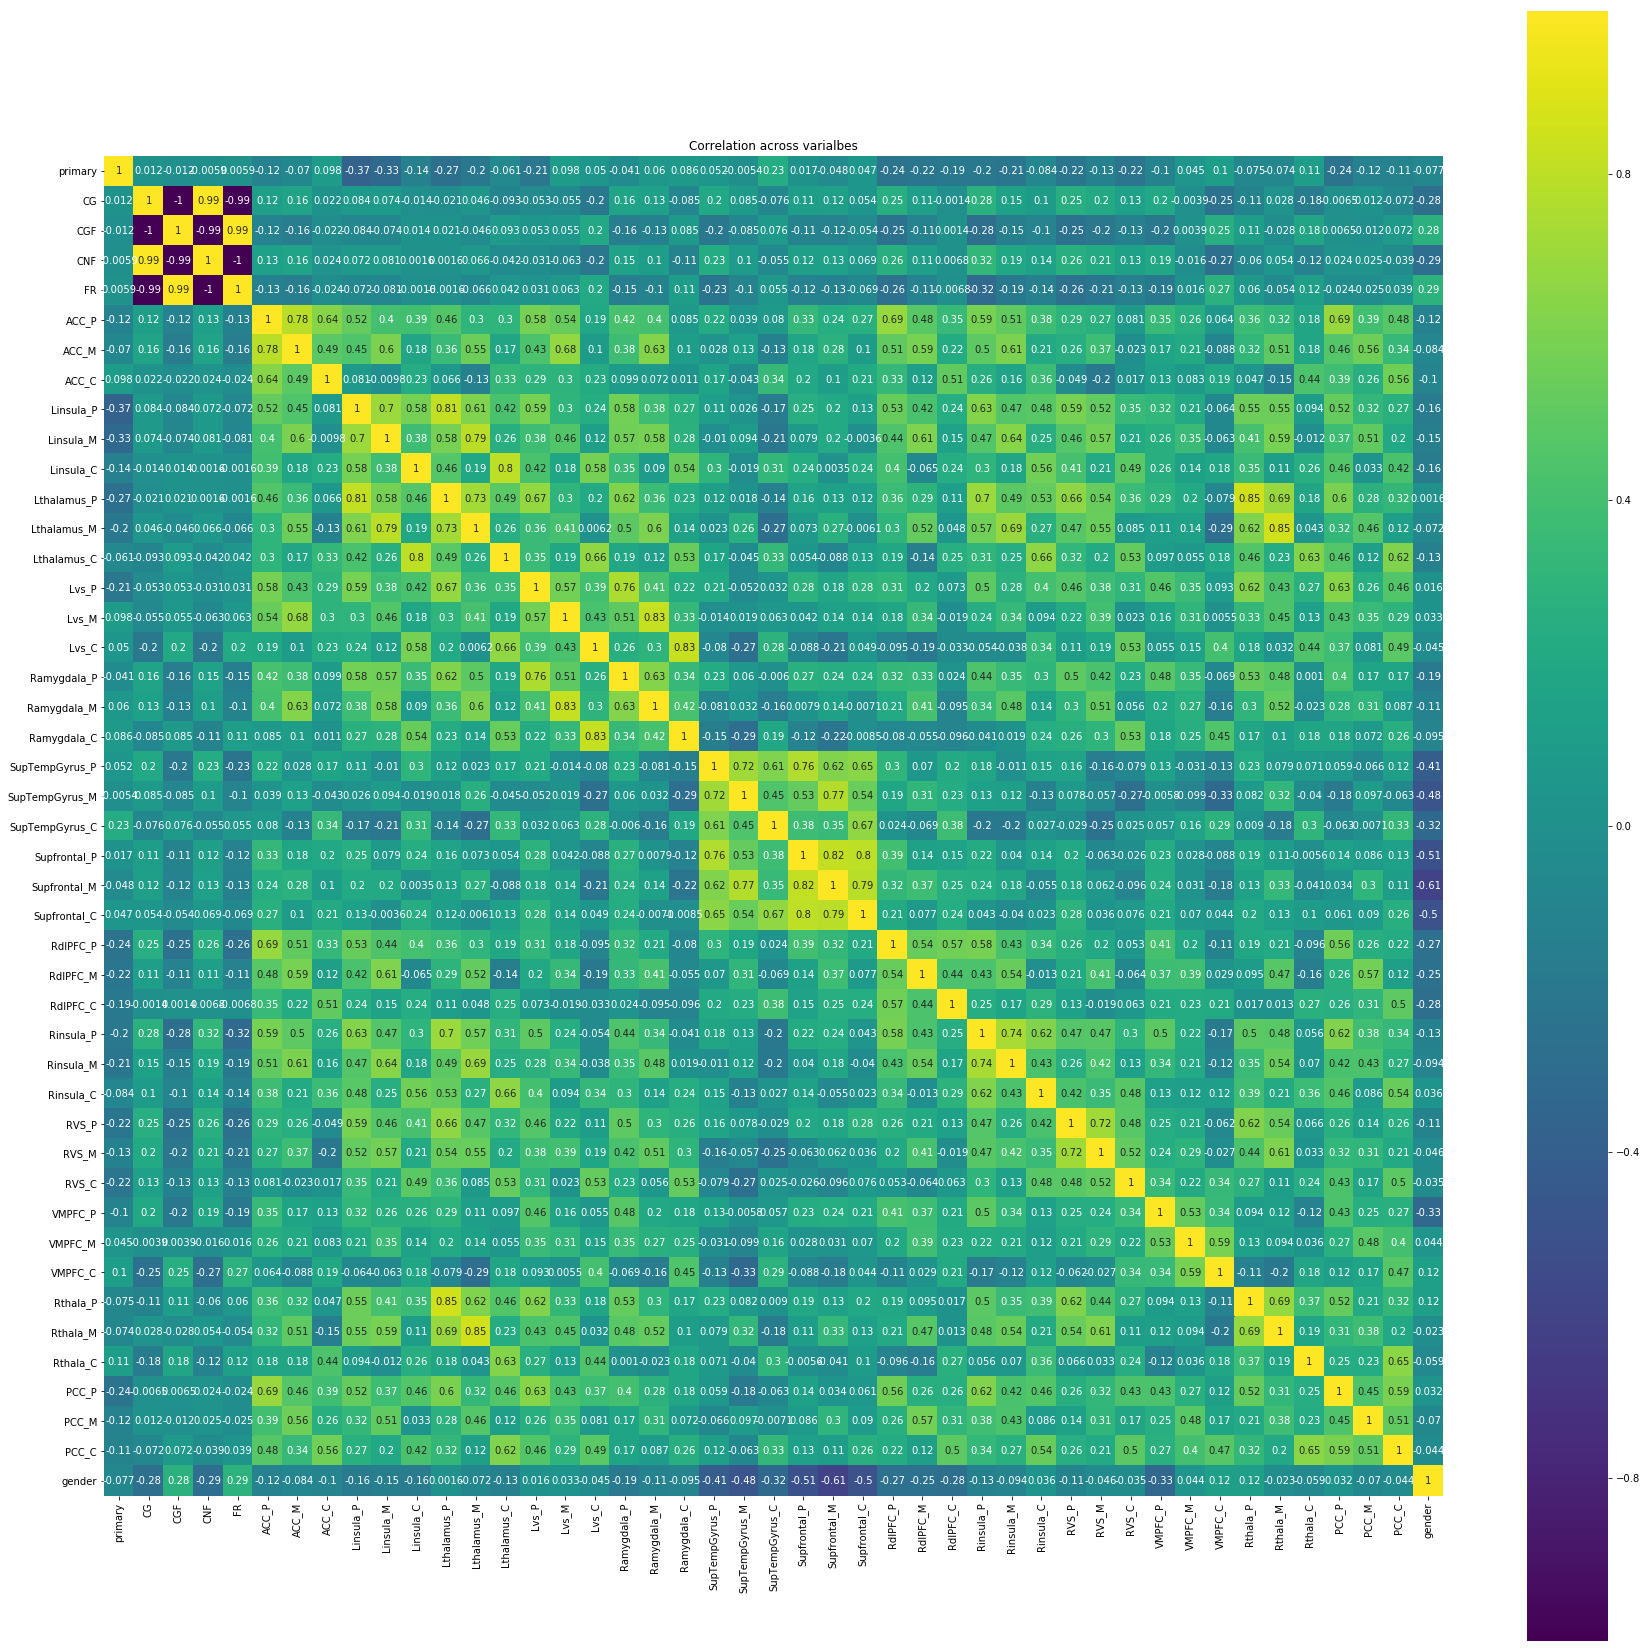

In [15]:
correlation = egg_data.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation across varialbes')